# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [ ]:
#importing the statements which are required for analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#loading the dataset to the dataframe
haberman = pd.read_csv("haberman.csv")

**Task-1: High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.**

**1.1: how many data-points and features?**

In [ ]:
haberman.shape

(306, 4)

**Observation(s)**
1.There are total of 306 data-points and 4 features

**1.2 What are the column names in our dataset?**

In [ ]:
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


**1.3 How many data points for each class are present? (or) How many flowers for each species are present?**

In [ ]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

**Task-2: Explain our objective.**

Our main objective is to classify the patients who has survived 5 years or longer after breast cancer surgery from the patient died within 5 year.

**Task-3: Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.**

**Probablity density Function**

**1: PDF with nodes feature**

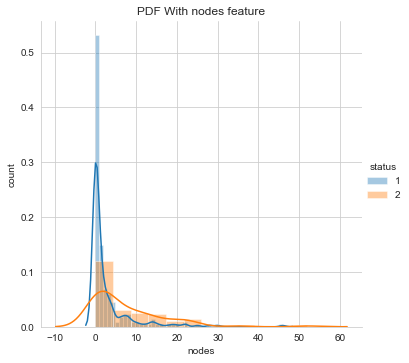

In [ ]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.ylabel("count")
plt.title("PDF With nodes feature")
plt.show();

**2 Pdf with year feature**

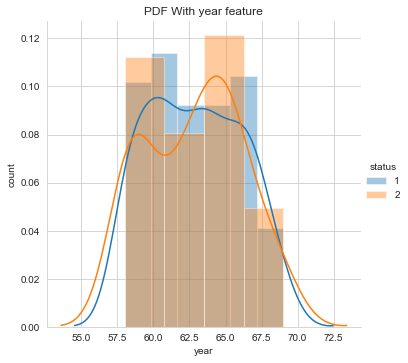

In [ ]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.ylabel("count")
plt.title("PDF With year feature")
plt.show();

**3 Pdf with age feature**

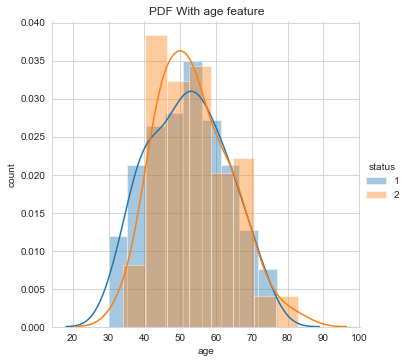

In [ ]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("PDF With age feature")
plt.ylabel("count")
plt.show();

**Cumulative Distribututive Function**

In [ ]:
haberman_1 = haberman.loc[haberman["status"] == 1];
haberman_2 = haberman.loc[haberman["status"] == 2];

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


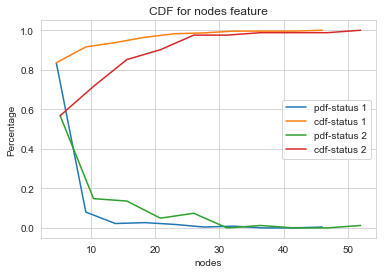

In [ ]:
counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf-status 1")
plt.plot(bin_edges[1:], cdf,label="cdf-status 1")

counts, bin_edges = np.histogram(haberman_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf-status 2")
plt.plot(bin_edges[1:], cdf,label="cdf-status 2")
plt.title("CDF for nodes feature")
plt.xlabel("nodes")
plt.ylabel("Percentage")
plt.legend()
plt.show();


**Boxplot**

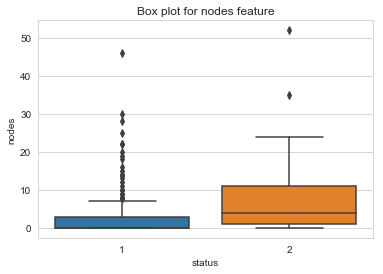

In [ ]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in pl otting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='status',y='nodes', data=haberman)
plt.title("Box plot for nodes feature")
plt.show()

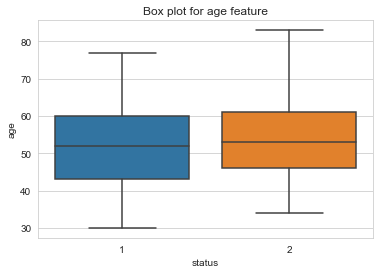

In [ ]:
sns.boxplot(x='status',y='age', data=haberman)
plt.title("Box plot for age feature")
plt.show()

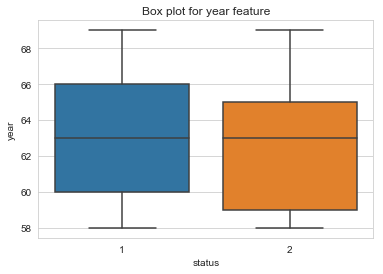

In [ ]:
sns.boxplot(x='status',y='year', data=haberman)
plt.title("Box plot for year feature")
plt.show()

Observations:
    we can say that nodes are used somewhat differentaite the status

**Voilin plots**

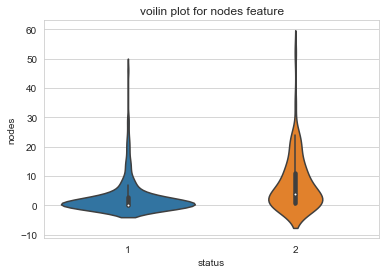

In [ ]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.title("voilin plot for nodes feature")
plt.show()

**Task-4 : Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.**

**1-D Scatter Plot**

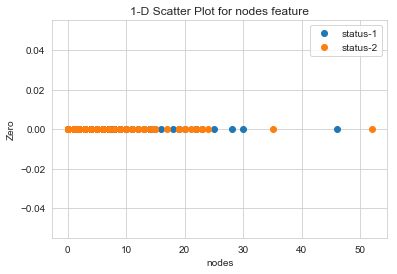

In [ ]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
plt.plot(haberman_1["nodes"], np.zeros_like(haberman_1['nodes']), 'o',label="status-1")
plt.plot(haberman_2["nodes"], np.zeros_like(haberman_2['nodes']), 'o',label="status-2")
plt.xlabel("nodes")
plt.ylabel("Zero")
plt.legend()
plt.title("1-D Scatter Plot for nodes feature")
plt.show()

#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

**2-D Scatter Plot**

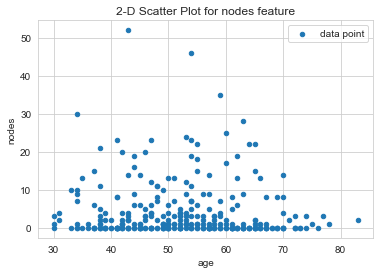

In [ ]:
haberman.plot(kind='scatter', x='age', y='nodes',label="data point") ;
plt.title("2-D Scatter Plot for nodes feature")
plt.legend()
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

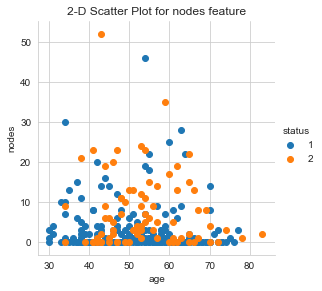

In [ ]:
# 2-D Scatter plot with color-coding for each class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("2-D Scatter Plot for nodes feature")
plt.show();

#Notice that we cannot seperate the blue points from red points
#Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 3C2 = 3.

**Pair Plot**

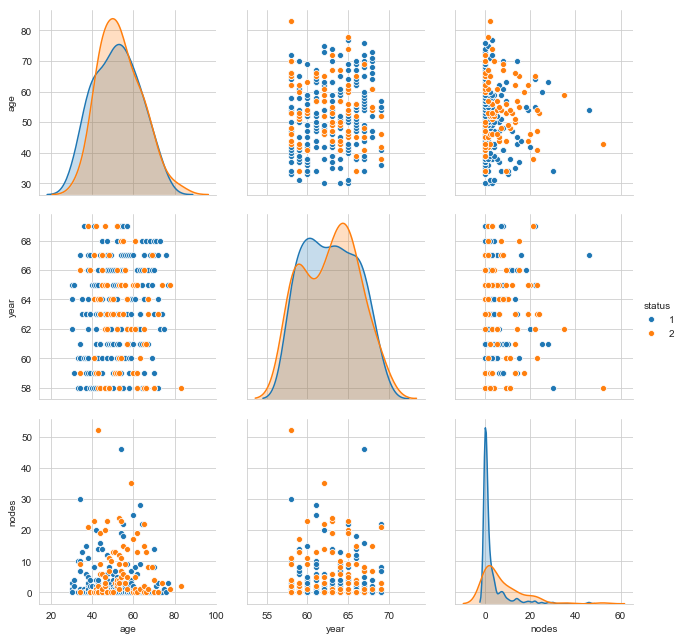

In [ ]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, vars=["age", "year","nodes"],hue="status",height=3)

#plt.title("Pair Plot for haberman dataset")
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**2D Density plot, contors-plot for status 1**

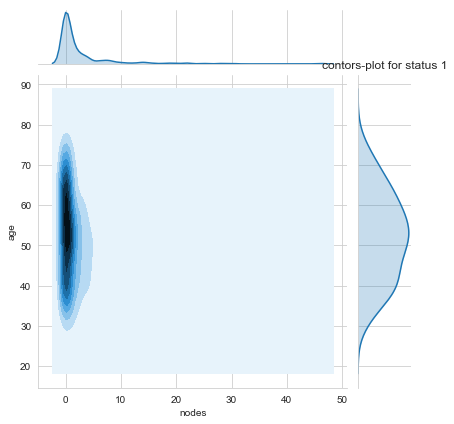

In [ ]:
sns.jointplot(x="nodes", y="age", data=haberman_1, kind="kde");
plt.title("contors-plot for status 1")
plt.show();


**2D Density plot, contors-plot status 2**

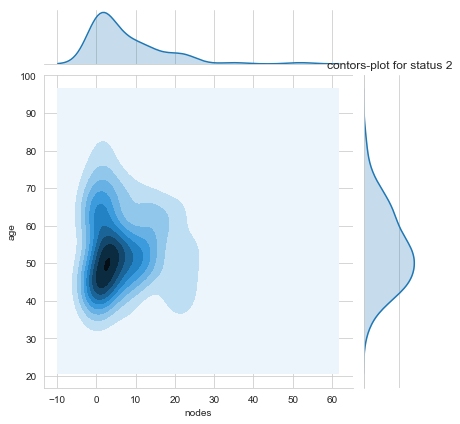

In [ ]:
sns.jointplot(x="nodes", y="age", data=haberman_2, kind="kde");
plt.title("contors-plot for status 2")
plt.grid()
plt.show();


# Observations